MGT 6203: Data Analytics in Business

Georgia Tech - EdX MicroMaster

Group 1 –

Joel Quek – redoctober89@gmail.com

Kevin Fong – kevinfkc95@hotmail.com

Ho Wei Sin – deekinjewel@yahoo.com

Soo Wen Jun – wenjun_1991@hotmail.com


# Section: Content Page

This Jupyter notebook is sectioned for easy reference.

Click this button on the left of the screen to access the content page

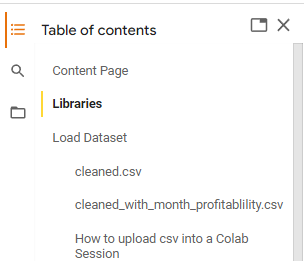

---

# Section: Libraries

In [ ]:
# Install packages
install.packages("dplyr") # need
install.packages("tidyr") # need
install.packages("ggplot2") #need
install.packages("lubridate") #need
install.packages('gplots') # need
install.packages("corrplot") # need
install.packages("glmnet") # need
install.packages('caret') # need
install.packages("pROC") # need

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gow

In [ ]:
# Load packages
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(gplots)
library(corrplot)
library(glmnet)
#library(randomForest)
library(caret)

Loading required package: lattice



---

# Background Information

## Background Information:
The film industry is a fiercely competitive sector, where achieving profitability and recognition through awards
are crucial measures of success. Film production companies can greatly benefit from understanding the key
factors that influence a movie's performance, allowing them to make informed decisions and maximize their
return on investment.


##Primary Research Question:
What are the primary factors that contribute to a movie's profitability and likelihood of winning awards?


##Supporting Research Questions:

1. What is the correlation between a movie's genre and its success?
2. Which factors play a role in determining whether a movie wins an Oscar?
3. Do movies released during holiday seasons, such as summer and winter, tend to perform better?
4. Are there common factors, such as production budget, MPAA rating, and critical reception, that significantly impact a film's profitability when compared to other movies?

---

# Load Dataset

There are 2 datasets in the folder EDA and Models (working Folder)

1. cleaned.csv

2. cleaned_with_month_profitablility.csv

## Dataset 1 - cleaned.csv

cleaned.csv is the csv compiled and cleaned by Kevin

## Dataset 2 - cleaned_with_month_profitablility.csv

cleaned_with_month_profitablility.csv is the original cleaned.csv with the addition of "profitability", "month" and "year" columns.

"profitability" - worldwide minus budget

"month" - month of release

"year" - year of release

## How to upload csv into a Colab Session

Step 1: Download the required csv onto your computer from the drive

Step 2: Click the orange button on the left of the screen


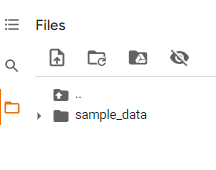

Step 3: Then click this button

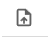

Step 4: Then upload csv from your computer

Note: You have to upload the csv every Colab session

---

# Open & Preview CSV

In [ ]:
oscar <- read.csv('movies_data_complete.csv')

In [ ]:
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,Nomination,MPAA.Category,Month,Profitability,CPI,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted
,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14/12/2019,129,R,6.5,Crime,0,0,X,12,-22071279,255.7,-32773670,38501591,71275261
2,2019,Superman II,5.40e+07,190400000,19/6/2019,127,PG,6.8,Action,0,0,PG,6,136400000,255.7,202540534,282725203,80184669
3,2019,Stone Cold,2.50e+07,9286314,17/5/2019,92,R,6.0,Action,0,0,X,5,-15713686,255.7,-23333272,13789260,37122532
4,2019,Blue Streak,3.60e+07,117448157,17/9/2019,93,PG-13,6.3,Action,0,0,TV-MA,9,81448157,255.7,120942472,174398918,53456446
5,2019,Message in a Bottle,3.00e+07,52880016,12/2/2019,126,PG-13,6.2,Drama,0,0,TV-MA,2,22880016,255.7,33974565,78521603,44547038
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19/5/2019,136,PG,6.5,Action,0,0,PG,5,912044677,255.7,1354296306,1525059953,170763647


# Data Dictionary

The following are descriptions for variables in the data set.

• Title : Name of the movie.

• Production Budget : The cost involved in making the movie. This excludes costs per taining to marketing, screening, and any other costs which do not directly constitute in the making of the movie.

• Worldwide Gross : The revenue generated from screening the movies in theatres around the world. It does not include revenue generated for movies that are released on platforms like Netflix, Amazon Prime etc.

• Domestic Gross : The revenue generated from screening the movies in theatres in USA and Canada. It does not include revenue generated for movies that are released on plat forms like Netflix, Amazon Prime etc.

• Date of Release : The date the movie was released in theatres in USA and Canada. 6

• CPI : This is short for Consumer Price Index. It is a way of measuring price changes over time. Here is an example of how it can be used. From the data set, the CPI for the year 2000 is 172.2 while the CPI for the year 2022 is 294.4. This means that a product that costs $1,000 in 2000, is estimated to cost

$\frac{294.4} {172.2} \times \$1, 000 = \$1,710$  in 2022.

• Duration : The running time of the movie in hours and minutes.

• MPAA rating : The Motion Picture Association of America film rating system is used in the United States and its territories to rate a motion picture’s suitability for certain audiences based on its content. If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the label Not Rated (NR) is used.

• IMDb rating : IMDb is an abbreviation for Internet Movie Database, which is an online database of information related to films. The IMDb offers a rating scale that allows users to rate films on a scale of one to ten based on how they feel about the film with a low score being regarded as an unfavourable view and a high score being regarded as a favourable one. The submitted ratings are filtered and weighted in various ways to produce a “weighted mean” that is displayed for each film and IMDb keeps the formula of the weighted mean as confidential.

• Voter Numbers : The number of people who rated the movie on IMDb.

• Metascore : Metacritic is a website that aggregates reviews of films, TV shows, music albums, video games and formerly, books. Each review is converted into a percentage, either mathematically from the mark given, or what the site decides subjectively from a qualitative review. The final score is a “weighted mean” and is called a Metascore. The score index is categorized as follows.

81 - 100 : Universal acclaim

61 - 80 : Generally favourable reviews

40 - 60 : Mixed or Average reviews

20 - 39 : Generally unfavourable reviews

0 - 19 : Overwhelming dislike

• Genre : A film genre is a stylistic or thematic category for motion pictures based on similarities either in the narrative elements, aesthetic approach, or the emotional response to the film.

• Opening Weekend : The ‘opening’ is taken to be the domestic gross revenue generated between the first day of release (usually a Friday) and the first Sunday following the movie’s release.



---

# Section: Exploratory Data Analysis (EDA) Part 2

https://towardsdatascience.com/exploratory-data-analysis-with-movies-3f32a4c3f2f3

## EDA: Correlation Heatmap

In [ ]:
install.packages('gplots')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gplots)

In [ ]:
# Convert the ReleaseDate column to a Date format
oscar$Release <- as.Date(oscar$Release)

In [ ]:
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,Nomination,MPAA.Category,Month,Profitability,CPI,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,0,X,12,-22071279,255.7,-32773670,38501591,71275261
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,0,PG,6,136400000,255.7,202540534,282725203,80184669
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,0,X,5,-15713686,255.7,-23333272,13789260,37122532
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,0,TV-MA,9,81448157,255.7,120942472,174398918,53456446
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,0,TV-MA,2,22880016,255.7,33974565,78521603,44547038
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,0,PG,5,912044677,255.7,1354296306,1525059953,170763647


In [ ]:
#Encode Genre & MPAA rating using label encoding
oscar$genre_code <- as.numeric(factor(oscar$Genre))
oscar$mpaa_code <- as.numeric(factor(oscar$MPAA.Rating))
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,Nomination,MPAA.Category,Month,Profitability,CPI,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted,genre_code,mpaa_code
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,0,X,12,-22071279,255.7,-32773670,38501591,71275261,6,11
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,0,PG,6,136400000,255.7,202540534,282725203,80184669,1,9
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,0,X,5,-15713686,255.7,-23333272,13789260,37122532,1,11
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,0,TV-MA,9,81448157,255.7,120942472,174398918,53456446,1,10
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,0,TV-MA,2,22880016,255.7,33974565,78521603,44547038,8,10
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,0,PG,5,912044677,255.7,1354296306,1525059953,170763647,1,9


In [ ]:
oscar_matrix <- oscar[, c('Budget', 'Worldwide','Award','Nomination','Profitability','Month','Year','genre_code','mpaa_code')]

In [ ]:
cor_matrix <- cor(oscar_matrix)
cor_matrix

,Budget,Worldwide,Award,Nomination,Profitability,Month,Year,genre_code,mpaa_code
Budget,1.00000000,0.72679437,0.02383231,0.01779763,0.58667714,0.037410730,0.15737484,-0.36711139,-0.026971515
Worldwide,0.72679437,1.00000000,0.16839705,0.16265360,0.98262328,0.036986189,0.06302204,-0.24319872,-0.055393687
Award,0.02383231,0.16839705,1.00000000,0.86119150,0.19210444,0.129906205,-0.20492223,0.02223382,-0.117035429
Nomination,0.01779763,0.16265360,0.86119150,1.00000000,0.18696352,0.158409595,-0.22282345,0.02971340,-0.126657859
Profitability,0.58667714,0.98262328,0.19210444,0.18696352,1.00000000,0.033498103,0.03177679,-0.18753222,-0.058022069
Month,0.03741073,0.03698619,0.12990620,0.15840960,0.03349810,1.000000000,-0.07026646,0.01860533,-0.008774247
Year,0.15737484,0.06302204,-0.20492223,-0.22282345,0.03177679,-0.070266457,1.00000000,-0.01257085,0.115757674
genre_code,-0.36711139,-0.24319872,0.02223382,0.02971340,-0.18753222,0.018605333,-0.01257085,1.00000000,0.047123427
mpaa_code,-0.02697151,-0.05539369,-0.11703543,-0.12665786,-0.05802207,-0.008774247,0.11575767,0.04712343,1.000000000


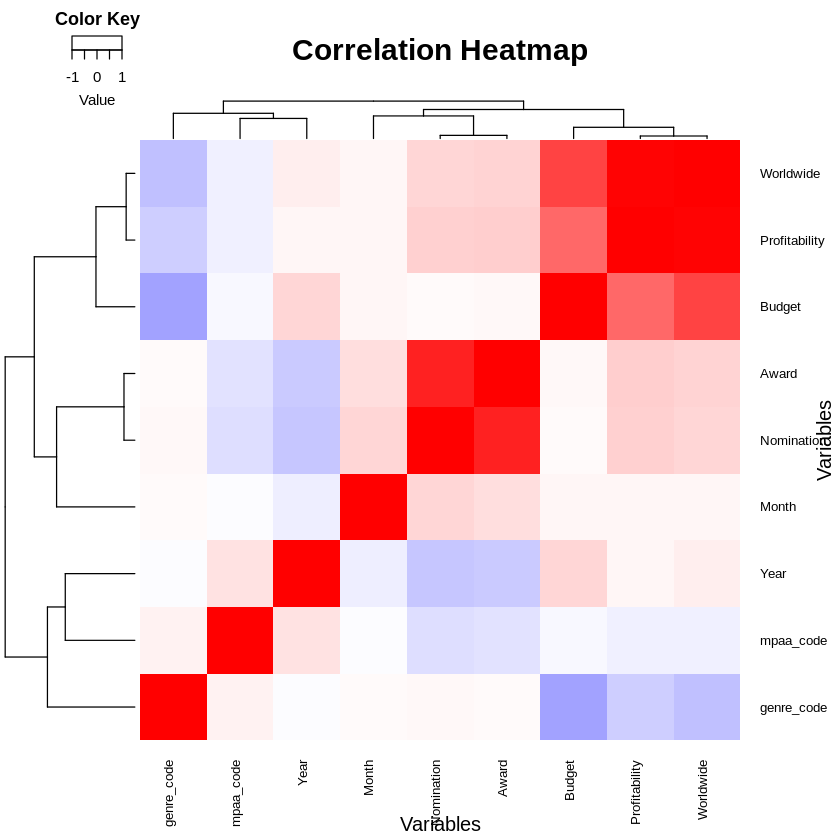

In [ ]:
# Create a heatmap with numerical values
heatmap.2(cor_matrix, col = colorRampPalette(c("blue", "white", "red"))(256),
          main = "Correlation Heatmap", xlab = "Variables", ylab = "Variables",
          trace = "none", key = TRUE, density.info = "none",
          cexCol = 0.8, cexRow = 0.8, keysize = 0.8)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



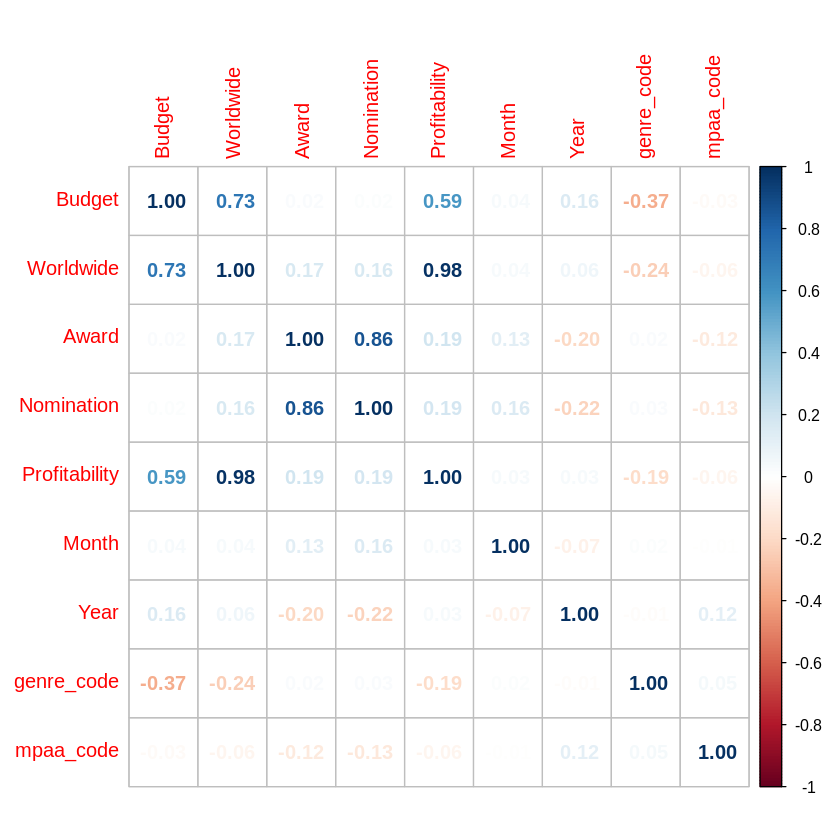

In [ ]:
install.packages("corrplot")
library(corrplot)

corrplot(cor_matrix, method="number")

### Observation

Budget and Worldwide gross have a
strong correlation of 0.73 which suggests
that a higher investment into a movie will
lead to a better ROI.
Budget and Profitability also has a
corresponding correlation of 0.59 which
corroborates with the idea that a higher
investment into a movie will lead to
higher profitability.

## EDA: Profit (Unadjusted) Vs Budget (Unadjusted) Scatter Plot

In [ ]:
library(ggplot2)  # Load ggplot2 packag

In [ ]:
# oscar <- read.csv('cleaned.csv')

In [ ]:
# Calculate profitability (Worldwide Gross - Budget)
# oscar$Profitability <- oscar$Worldwide - oscar$Budget

In [ ]:
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,Nomination,MPAA.Category,Month,Profitability,CPI,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,0,X,12,-22071279,255.7,-32773670,38501591,71275261
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,0,PG,6,136400000,255.7,202540534,282725203,80184669
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,0,X,5,-15713686,255.7,-23333272,13789260,37122532
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,0,TV-MA,9,81448157,255.7,120942472,174398918,53456446
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,0,TV-MA,2,22880016,255.7,33974565,78521603,44547038
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,0,PG,5,912044677,255.7,1354296306,1525059953,170763647


#### Scatter Plot: Linear-Linear

`geom_smooth()` using formula = 'y ~ x'


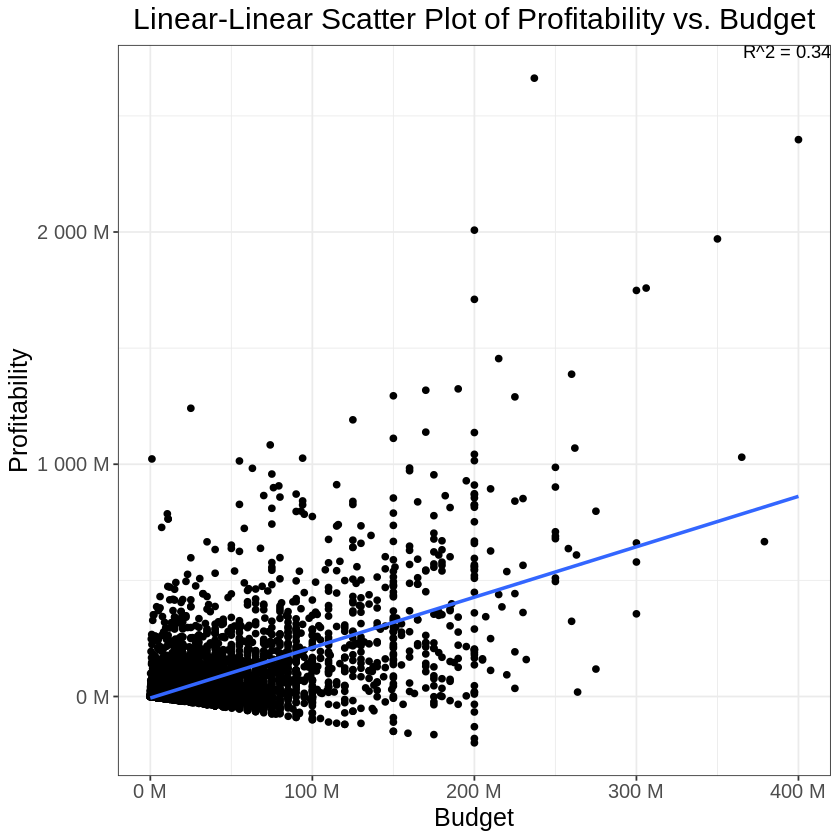

In [ ]:
ggplot(oscar, aes(x = Budget, y = Profitability)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Budget", y = "Profitability") +
  ggtitle("Linear-Linear Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  scale_x_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  theme(plot.title = element_text(hjust = 0.5),text=element_text(size=15)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(Profitability ~ Budget, data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
linear_linear_model = lm(Profitability ~ Budget, data = oscar)
summary(linear_linear_model)


Call:
lm(formula = Profitability ~ Budget, data = oscar)

Residuals:
       Min         1Q     Median         3Q        Max 
-627197283  -41285853   -3902986   14887509 2154408542 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.552e+06  2.141e+06  -3.061  0.00222 ** 
Budget       2.171e+00  3.918e-02  55.410  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 130600000 on 5850 degrees of freedom
Multiple R-squared:  0.3442,	Adjusted R-squared:  0.3441 
F-statistic:  3070 on 1 and 5850 DF,  p-value: < 2.2e-16


Linear-Linear $R^2$ is 0.34

Plot looks heteroscedastic

### Scatter Plot: Log-Linear

Warning message in log(Profitability):
“NaNs produced”
Warning message in log(Profitability):
“NaNs produced”
Warning message in log(Profitability):
“NaNs produced”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2030 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2030 rows containing missing values (`geom_point()`).”


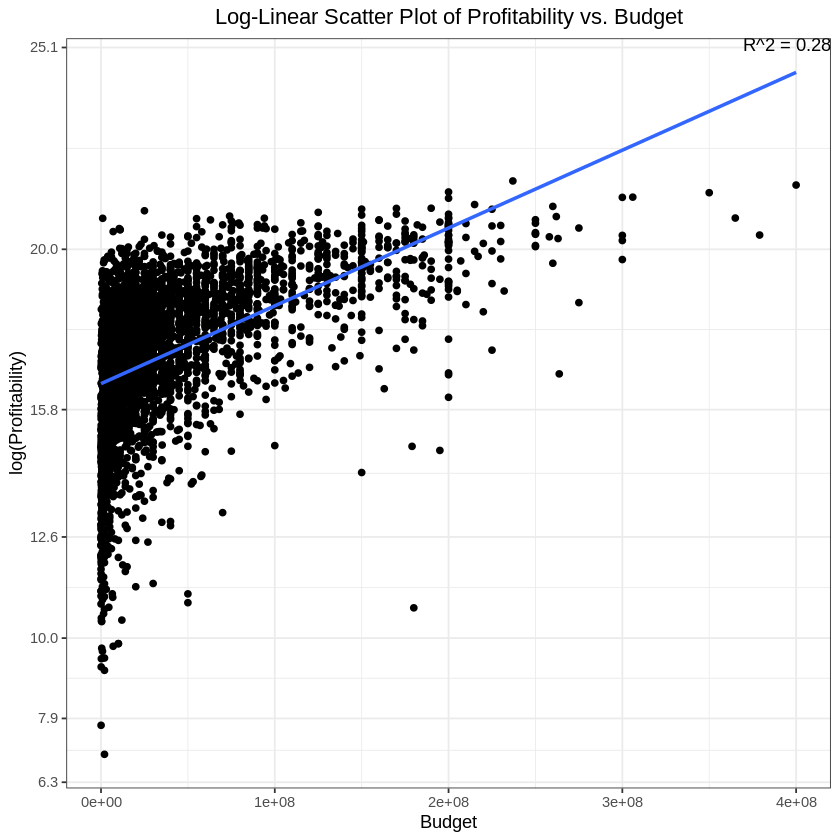

In [ ]:
ggplot(oscar, aes(x = Budget, y = log(Profitability))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  scale_y_continuous(labels = scales::comma, breaks = scales::trans_breaks("log10", function(x) 10^x)) +
  labs(x = "Budget", y = "log(Profitability)") +
  ggtitle("Log-Linear Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(log(Profitability) ~ Budget, data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
log_linear_model = lm(log(Profitability) ~ Budget, data = oscar)
summary(log_linear_model)

Warning message in log(Profitability):
“NaNs produced”



Call:
lm(formula = log(Profitability) ~ Budget, data = oscar)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5288 -0.7658  0.2255  1.0306  4.2127 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.651e+01  3.248e-02  508.40   <2e-16 ***
Budget      1.992e-08  5.205e-10   38.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.576 on 3820 degrees of freedom
  (2030 observations deleted due to missingness)
Multiple R-squared:  0.2772,	Adjusted R-squared:  0.277 
F-statistic:  1465 on 1 and 3820 DF,  p-value: < 2.2e-16


Log-Linear $R^2$ is 0.28

### Scatter Plot: Linear-Log

`geom_smooth()` using formula = 'y ~ x'


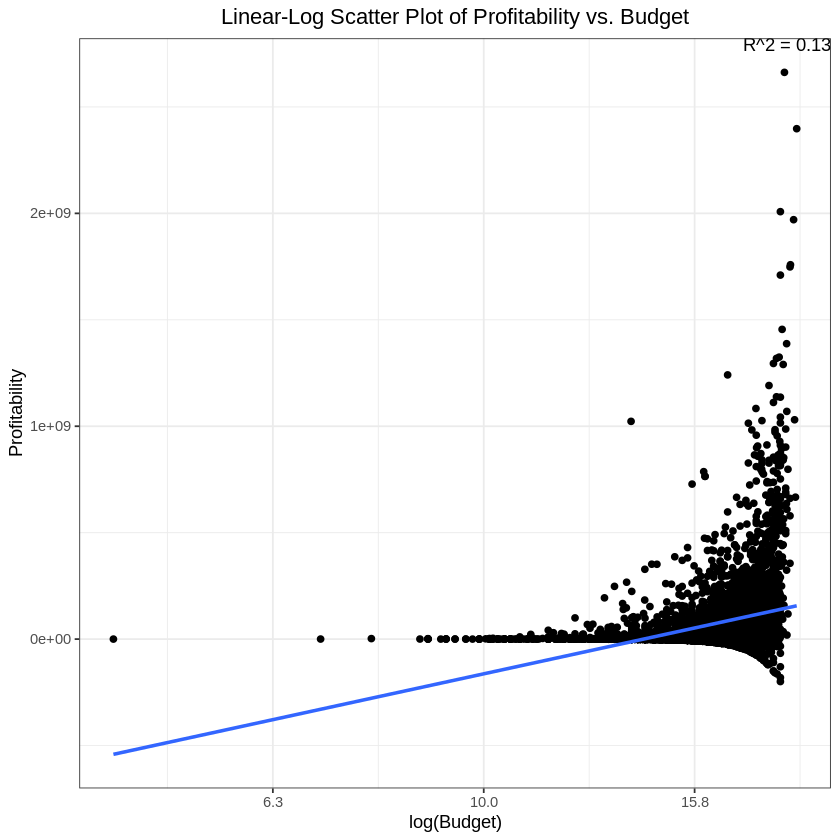

In [ ]:
ggplot(oscar, aes(x = log(Budget), y = Profitability)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_log10(labels = scales::comma, breaks = scales::trans_breaks("log10", function(x) 10^x)) +
  labs(x = "log(Budget)", y = "Profitability") +
  ggtitle("Linear-Log Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(Profitability ~ log(Budget), data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
linear_log_model = lm(Profitability ~ log(Budget), data = oscar)
summary(linear_log_model)


Call:
lm(formula = Profitability ~ log(Budget), data = oscar)

Residuals:
       Min         1Q     Median         3Q        Max 
-357147319  -71567553  -28616426   22279250 2499026169 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -490940814   19322628  -25.41   <2e-16 ***
log(Budget)   33930373    1173128   28.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 150800000 on 5850 degrees of freedom
Multiple R-squared:  0.1251,	Adjusted R-squared:  0.125 
F-statistic: 836.5 on 1 and 5850 DF,  p-value: < 2.2e-16


Linear-Log $R^2$ is 0.13

### Scatter Plot: Log-Log

Warning message in log(Profitability):
“NaNs produced”
Warning message in log(Profitability):
“NaNs produced”
Warning message in log(Profitability):
“NaNs produced”
Warning message in log(Profitability):
“NaNs produced”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2030 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2030 rows containing missing values (`geom_point()`).”


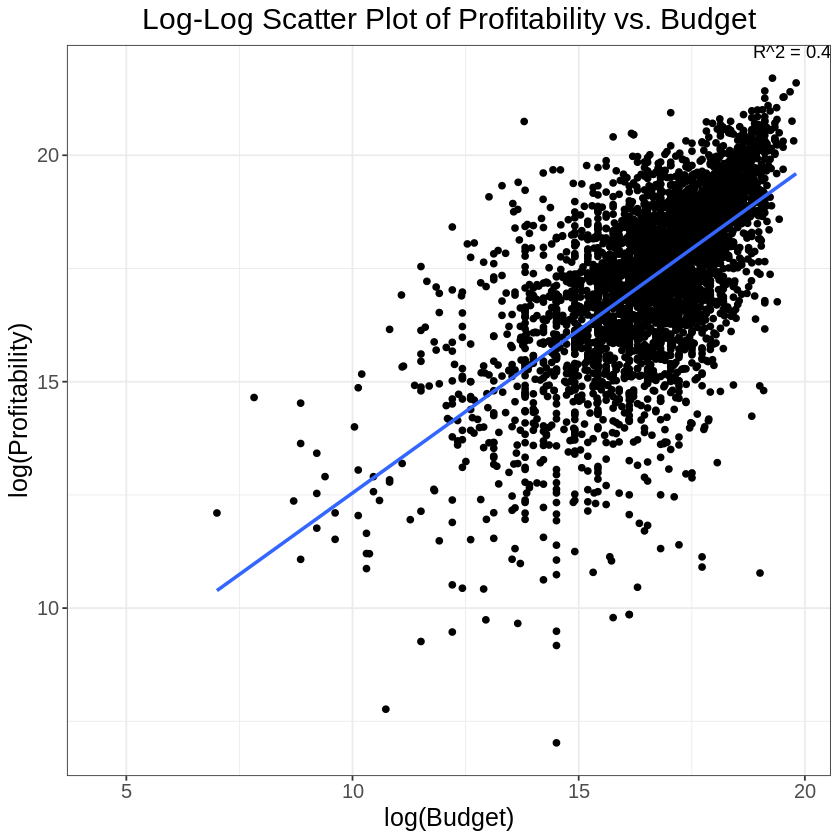

In [ ]:
# Create the scatter plot with regression line and R-squared value using ggplot2
ggplot(oscar, aes(x = log(Budget), y = log(Profitability))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  #scale_x_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  #scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  labs(x = "log(Budget)", y = "log(Profitability)") +
  ggtitle("Log-Log Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5),text=element_text(size=15)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(log(Profitability) ~ log(Budget), data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
log_log_model = lm(log(Profitability) ~ log(Budget), data = oscar)
summary(log_log_model)

Warning message in log(Profitability):
“NaNs produced”



Call:
lm(formula = log(Profitability) ~ log(Budget), data = oscar)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7600 -0.7449  0.1647  0.9212  5.4743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.35095    0.23858   22.43   <2e-16 ***
log(Budget)  0.71913    0.01431   50.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.438 on 3820 degrees of freedom
  (2030 observations deleted due to missingness)
Multiple R-squared:  0.398,	Adjusted R-squared:  0.3979 
F-statistic:  2526 on 1 and 3820 DF,  p-value: < 2.2e-16


Log-Log $R^2$ is 0.4

### Observation

Linear -Linear plot shows heteroscedasticity in the data, thus a non-linear plot would be advised. The group plotted all
possible logarithmic plots and found the Log-Log plot to have the highest R-squared value. The plot and the summary of
model quality can be found below.

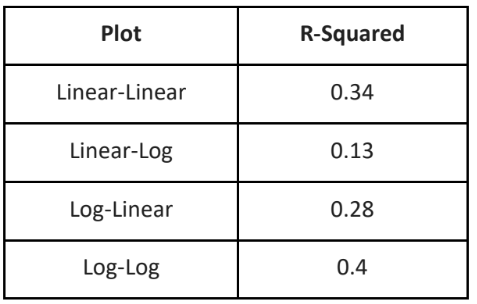

---

## EDA: Profit (Adjusted) Vs Budget (Adjusted) Scatter Plot

The **reference year is 2000** CPI for that year is 172.2.

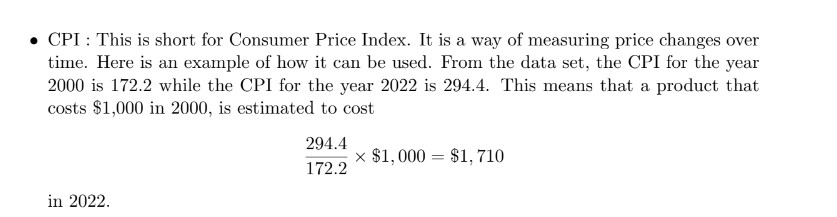

In [ ]:
oscar <- read.csv('cleaned_with_month_profitablility.csv')

Warning message in file(file, "rt"):
“cannot open file 'cleaned_with_month_profitablility.csv': No such file or directory”


ERROR: ignored

In [ ]:
head(oscar)

In [ ]:
cpi <- read.csv('cpi.csv')

In [ ]:
head(cpi)

In [ ]:
cpi_merged <- merge(oscar, cpi, by = "Year", all.x = TRUE)

In [ ]:
cpi_merged$Profitability.Adjusted <- (cpi_merged$CPI/172.2)*cpi_merged$Profitability

cpi_merged$Worldwide.Adjusted <- (cpi_merged$CPI/172.2)*cpi_merged$Worldwide

cpi_merged$Budget.Adjusted <- (cpi_merged$CPI/172.2)*cpi_merged$Budget

In [ ]:
head(cpi_merged)

In [ ]:
write.csv(cpi_merged, file = "movies_data_complete.csv", row.names = FALSE)

### Scatter-Plot: Linear-Linear

In [ ]:
ggplot(oscar, aes(x = Budget.Adjusted, y = Profitability.Adjusted)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Budget", y = "Profitability") +
  ggtitle("Linear-Linear Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  scale_x_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  theme(plot.title = element_text(hjust = 0.5),text=element_text(size=15)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(Profitability.Adjusted ~ Budget.Adjusted, data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
linear_linear_model = lm(Profitability.Adjusted ~ Budget.Adjusted, data = oscar)
summary(linear_linear_model)

## Scatter-Plot: Log-Linear

In [ ]:
ggplot(oscar, aes(x = Budget.Adjusted, y = log(Profitability.Adjusted))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  scale_y_continuous(labels = scales::comma, breaks = scales::trans_breaks("log10", function(x) 10^x)) +
  labs(x = "Budget", y = "log(Profitability)") +
  ggtitle("Log-Linear Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(log(Profitability.Adjusted) ~ Budget.Adjusted, data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
log_linear_model = lm(log(Profitability.Adjusted) ~ Budget.Adjusted, data = oscar)
summary(log_linear_model)

## Scatter-Plot: Linear-Log

In [ ]:
ggplot(oscar, aes(x = log(Budget.Adjusted), y = Profitability.Adjusted)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_log10(labels = scales::comma, breaks = scales::trans_breaks("log10", function(x) 10^x)) +
  labs(x = "log(Budget)", y = "Profitability") +
  ggtitle("Linear-Log Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(Profitability.Adjusted ~ log(Budget.Adjusted), data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
linear_log_model = lm(Profitability.Adjusted ~ log(Budget.Adjusted), data = oscar)
summary(linear_log_model)

## Scatter-Plot: Log-Log

In [ ]:
# Create the scatter plot with regression line and R-squared value using ggplot2
ggplot(oscar, aes(x = log(Budget.Adjusted), y = log(Profitability.Adjusted))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  #scale_x_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  #scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  labs(x = "log(Budget)", y = "log(Profitability)") +
  ggtitle("Log-Log Scatter Plot of Profitability vs. Budget") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5),text=element_text(size=15)) +
  annotate("text", x = Inf, y = Inf, label = paste0("R^2 = ", round(summary(lm(log(Profitability.Adjusted) ~ log(Budget.Adjusted), data = oscar))$r.squared, 2)), hjust = 1, vjust = 1)

In [ ]:
log_log_model = lm(log(Profitability.Adjusted) ~ log(Budget.Adjusted), data = oscar)
summary(log_log_model)

---

## EDA: Boxplots of Budget and Worldwide Gross aggregated by Genres

In [ ]:
head(oscar)

In [ ]:
library(ggplot2)

In [ ]:
# Create a boxplot using ggplot2

# options(repr.plot.width = 30, repr.plot.height = 20)

ggplot(oscar, aes(x = Genre, y = Profitability)) +
  geom_boxplot() +
  xlab("Genre") +
  ylab("Profitability") +
  ggtitle("Box Plot of Profitability by Genre")+
  scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  coord_flip()+
  theme_minimal() +
  theme(text=element_text(size=20))

---

## EDA: Top 20 Movies Profit-Budget Analysis

In [ ]:
# Sort the dataframe by profitability in descending order
df_sorted <- oscar[order(oscar$Profitability, decreasing = TRUE), ]

# Extract the top 20 profitable movies
top_20_profitable_movies <- head(df_sorted, 20)


In [ ]:
top_20_profitable_movies

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 15)


# Create a bar chart with profitability and budget for each movie
ggplot(top_20_profitable_movies, aes(x = reorder(Title, -Profitability))) +
  geom_bar(aes(y = Profitability, fill = "Profitability"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = Budget, fill = "Budget"), stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("Profitability" = "red3", "Budget" = "skyblue")) +
  scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6))+
  xlab("Movie") +
  ylab("Amount") +
  theme_minimal()+
  coord_flip() +
  ggtitle("Profitability and Budget of Top 20 Profitable Movies")+
  theme(text=element_text(size=20))


### Observation

When comparing profit across genres, animation movies appear to be better based on the five number
summaries followed by Action and Adventure. This observation is based on the median and max values of the
boxplots.
It appears that the top 20 profitable movies have at least a 10x profit margin. The highest being Beauty and
the Beast.

---

## EDA: Seasonality Effect on Profitability and Likelihood of Winning An Oscar

In [ ]:
library(ggplot2)
library(lubridate)

In [ ]:
# Group the data by month and year and calculate the sum of OscarsWon
seasonality_data <- aggregate(Award ~ Month + Year, data = oscar, FUN = sum)


In [ ]:
# Create a seasonality chart
ggplot(seasonality_data, aes(x = Month, y = Award, fill = as.factor(Year))) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_discrete(name = "Year") +
  xlab("Month") +
  ylab("Number of Oscars Won") +
  ggtitle("Seasonality Chart of Oscars Won by Month") +
  theme_minimal()+
  theme(legend.position = "top",
        text=element_text(size=30))+
  scale_x_continuous(
    breaks = 1:12,
    labels = month.abb
  )


### Observation

From the chart, there seems to be a higher
chance of winning an Oscar if the movie is
released in December than compared to
January.

---

# HYPOTHESES/INSIGHTS

From the initial analysis, it can be observed that movies released in summer are less likely to win the Oscars.
Other considerations such as a larger financial investment, particular genres (e.g., action, adventure, fantasy),
favorable critical reception (higher IMDB rating), and a strong opening weekend significantly contribute to the
success of a movie. This success can be measured by factors such as worldwide box office earnings and the
achievement of prestigious awards like the Oscars.

# PROJECT APPROACH AND MODELS

In carrying out the project, these are the 6 main steps:

## 1. Collecting and Preparing data
During the data preparation phase, both source datasets (movie titles with sales and ratings, movies with
Oscar information) were merged into a unified dataset. The joins were performed based on the same
movie title. If there is more than one movie of the same title, the older record was removed as there
could be remakes of the same movie. The merged data was further pre-processed by addressing missing
values, encoding categorical variables, and scaling numerical features if deemed necessary.
Some of the data records had null Budget and Release dates, so data imputation was carried out using
sources from the Internet. During the web scraping process, it was difficult to access the code and hence
the data could not be easily retrieved. Another challenge encountered was the inclusion of unwanted
characters in the Budget field and multiple Release dates.

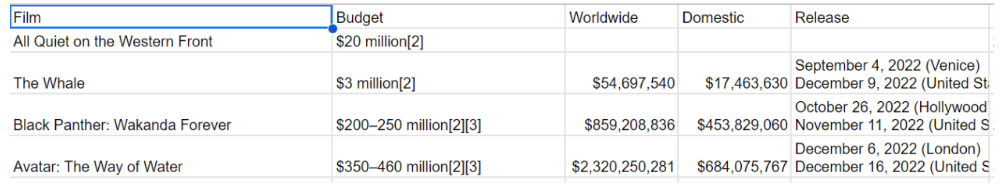

## 2. Choosing a model
Based on preliminary research, the models chosen to solve the business questions include multilinear
regression, decision trees, random forests, and gradient boosting algorithms.

###Classification
● Random forest/ Classification and Regression Trees (CART) for Likelihood of Winning an Oscar

● Assess Random Forest Model Quality using ROC/AUC

● Logistic Regression for Likelihood of Winning an Oscar

● Assess Logistic Regression Model Quality using ROC/AUC

###Regression
● Multilinear Regression on Profitability

● Assess Regression Model Quality using RMSE

● Gradient Boosting to Improve Regression Model

● Elastic Net Regression on Profitability

● Assess Elastic Net Regression Model Quality using RMSE

### 3. Training a model
Prior to modeling, feature selection methods such as regularization and random forest importance may
be carried out to reduce the number of input variables for the model. This reduces model training time
and issues of overfitting. Some of the feature selection techniques are embedded within the algorithms.
During training of the model, cross-validation techniques will also be implemented to prevent overfitting
and reduce selection bias.

### 4. Evaluation of models
Depending on the type of problem (classification/regression), the performance of the models will be
evaluated using respective metrics. For classification models, we will use accuracy, confusion matrix, and

AUC-ROC metrics. For regression models, we will use Root Mean Squared Error (RMSE) and Adjusted R-
Squared.

---

# Section: Success Factor 1 - Profitability (Numerical Data Analysis)

## Profitability Model 1

### a. Multilinear Regression on Profitability



In [ ]:
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,⋯,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted,genre_code,mpaa_code,Profitability.Adj.Scale,Worldwide.Adj.Scale,Budget.Adj.Scale,predicted,residuals
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,⋯,-32773670,38501591,71275261,6,11,-0.53833837,-0.37990559,0.33352092,0.177171652,-0.71551002
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,⋯,202540534,282725203,80184669,1,9,0.43442898,0.47605774,0.46963783,0.338549803,0.09587917
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,⋯,-23333272,13789260,37122532,1,11,-0.49931263,-0.46651822,-0.18826056,-0.181698615,-0.31761402
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,⋯,120942472,174398918,53456446,1,10,0.09711007,0.09639204,0.06128711,-0.002265647,0.09937572
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,⋯,33974565,78521603,44547038,8,10,-0.26240728,-0.23964207,-0.07482980,-0.065728423,-0.19667886
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,⋯,1354296306,1525059953,170763647,1,9,5.19568175,4.83023535,1.85349306,1.092211337,4.10347041


In [ ]:
#feature scaling
oscar <- oscar %>%
  mutate(Profitability.Adj.Scale = scale(oscar$Profitability.Adjusted)) %>%
  mutate(Worldwide.Adj.Scale  = scale(oscar$Worldwide.Adjusted)) %>%
  mutate(Budget.Adj.Scale = scale(oscar$Budget.Adjusted))
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,⋯,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted,genre_code,mpaa_code,Profitability.Adj.Scale,Worldwide.Adj.Scale,Budget.Adj.Scale,predicted,residuals
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,⋯,-32773670,38501591,71275261,6,11,-0.53833837,-0.37990559,0.33352092,0.177171652,-0.71551002
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,⋯,202540534,282725203,80184669,1,9,0.43442898,0.47605774,0.46963783,0.338549803,0.09587917
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,⋯,-23333272,13789260,37122532,1,11,-0.49931263,-0.46651822,-0.18826056,-0.181698615,-0.31761402
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,⋯,120942472,174398918,53456446,1,10,0.09711007,0.09639204,0.06128711,-0.002265647,0.09937572
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,⋯,33974565,78521603,44547038,8,10,-0.26240728,-0.23964207,-0.07482980,-0.065728423,-0.19667886
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,⋯,1354296306,1525059953,170763647,1,9,5.19568175,4.83023535,1.85349306,1.092211337,4.10347041


In [ ]:
#Create dataframe with selected columns
oscar_df <- oscar[, c("Profitability.Adj.Scale", "Budget.Adj.Scale", "Award", "Month", "IMDB.Rating")]
head(oscar_df)

,Profitability.Adj.Scale,Budget.Adj.Scale,Award,Month,IMDB.Rating
,"<dbl[,1]>","<dbl[,1]>",<int>,<int>,<dbl>
1,-0.53833837,0.33352092,0,12,6.5
2,0.43442898,0.46963783,0,6,6.8
3,-0.49931263,-0.18826056,0,5,6.0
4,0.09711007,0.06128711,0,9,6.3
5,-0.26240728,-0.07482980,0,2,6.2
6,5.19568175,1.85349306,0,5,6.5


In [ ]:
# Perform multiple linear regression
model <- lm(Profitability.Adj.Scale ~ Budget.Adj.Scale + IMDB.Rating + Month + Award, data = oscar_df)

# Print the summary of the linear regression model
summary(model)


Call:
lm(formula = Profitability.Adj.Scale ~ Budget.Adj.Scale + IMDB.Rating + 
    Month + Award, data = oscar_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8362 -0.2717 -0.0374  0.1650 12.8201 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.907512   0.065758 -13.801  < 2e-16 ***
Budget.Adj.Scale  0.579058   0.010184  56.857  < 2e-16 ***
IMDB.Rating       0.144269   0.010027  14.388  < 2e-16 ***
Month            -0.008347   0.003027  -2.758  0.00583 ** 
Award             0.162262   0.012585  12.893  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7769 on 5825 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.3986,	Adjusted R-squared:  0.3982 
F-statistic: 965.3 on 4 and 5825 DF,  p-value: < 2.2e-16


### b. Assess Regression Model Quality using RMSE

#### Predictions

In [ ]:
oscar_df$predicted <- predict(model, newdata = oscar_df)

In [ ]:
oscar_df$residuals <- oscar_df$Profitability.Adj.Scale - oscar$predicted

In [ ]:
oscar_df$residuals<-as.numeric(oscar_df$residuals)

In [ ]:
head(oscar_df)

,Profitability.Adj.Scale,Budget.Adj.Scale,Award,Month,IMDB.Rating,genre_code,mpaa_code,predicted,residuals
,"<dbl[,1]>","<dbl[,1]>",<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.53833837,0.33352092,0,12,6.5,6,11,0.12292919,-0.71551002
2,0.43442898,0.46963783,0,6,6.8,1,9,0.28156903,0.09587917
3,-0.49931263,-0.18826056,0,5,6.0,1,11,-0.23534425,-0.31761402
4,0.09711007,0.06128711,0,9,6.3,1,10,-0.06776237,0.09937572
5,-0.26240728,-0.07482980,0,2,6.2,8,10,-0.04778993,-0.19667886
6,5.19568175,1.85349306,0,5,6.5,1,9,1.06024468,4.10347041


In [ ]:
sum_res <- sum(oscar_df$residuals, na.rm = TRUE)
sum_res

[1] -7.432457e-13

In [ ]:
mse <- sum_res^2 / length(oscar_df$residuals)

In [ ]:
print(mse)

[1] 9.439751e-29


In [ ]:
rmse <- sqrt(mse)
print(rmse)

[1] 9.715838e-15


### c. Gradient Boosting to Improve Regression Model

In [ ]:
install.packages("rpart.plot") # need
install.packages("xgboost") # need
library(rpart.plot)
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
#feature scaling done after encoding
oscar <- oscar %>%
  mutate(Profitability.Adj.Scale = scale(oscar$Profitability.Adjusted)) %>%
  mutate(Worldwide.Adj.Scale  = scale(oscar$Worldwide.Adjusted)) %>%
  mutate(Budget.Adj.Scale = scale(oscar$Budget.Adjusted))
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,⋯,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted,genre_code,mpaa_code,Profitability.Adj.Scale,Worldwide.Adj.Scale,Budget.Adj.Scale,predicted,residuals
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,⋯,-32773670,38501591,71275261,6,11,-0.53833837,-0.37990559,0.33352092,0.177171652,-0.71551002
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,⋯,202540534,282725203,80184669,1,9,0.43442898,0.47605774,0.46963783,0.338549803,0.09587917
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,⋯,-23333272,13789260,37122532,1,11,-0.49931263,-0.46651822,-0.18826056,-0.181698615,-0.31761402
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,⋯,120942472,174398918,53456446,1,10,0.09711007,0.09639204,0.06128711,-0.002265647,0.09937572
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,⋯,33974565,78521603,44547038,8,10,-0.26240728,-0.23964207,-0.07482980,-0.065728423,-0.19667886
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,⋯,1354296306,1525059953,170763647,1,9,5.19568175,4.83023535,1.85349306,1.092211337,4.10347041


In [ ]:
#Create dataframe with selected columns
#oscar_df <- oscar[, c("Profitability.Adjusted", "Budget.Adjusted", "Award", "Month", "IMDB.Rating", "genre_code", "mpaa_code")]
oscar_df <- oscar[, c("Profitability.Adj.Scale", "Budget.Adj.Scale", "Award", "Month", "IMDB.Rating", "genre_code", "mpaa_code")]
#oscar_df

In [ ]:
# train-test-split
parts = createDataPartition(oscar_df$Profitability.Adj.Scale, p = 0.8, list = F)
train = oscar_df[parts, ]
test = oscar_df[-parts, ]

In [ ]:
#Define predictor and response variables in training set
train_x = data.matrix(train[, -1])
train_y = train[, 1]

#Define predictor and response variables in testing set
test_x = data.matrix(test[, -1])
test_y = test[, 1]

#Define training and testing sets
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

In [ ]:
#Define a watchlist of train and test
watchlist = list(train=xgb_train, test=xgb_test)

#fit XGBoost model and display training and testing data
model = xgb.train(data = xgb_train, max.depth = 3, watchlist=watchlist, nrounds = 100)

[1]	train-rmse:0.914384	test-rmse:1.099738 
[2]	train-rmse:0.813630	test-rmse:0.988951 
[3]	train-rmse:0.757044	test-rmse:0.937752 
[4]	train-rmse:0.718004	test-rmse:0.898572 
[5]	train-rmse:0.693153	test-rmse:0.873901 
[6]	train-rmse:0.678086	test-rmse:0.855019 
[7]	train-rmse:0.669391	test-rmse:0.847531 
[8]	train-rmse:0.658065	test-rmse:0.830867 
[9]	train-rmse:0.653484	test-rmse:0.831978 
[10]	train-rmse:0.648733	test-rmse:0.826075 
[11]	train-rmse:0.645759	test-rmse:0.821996 
[12]	train-rmse:0.638989	test-rmse:0.817778 
[13]	train-rmse:0.637388	test-rmse:0.819807 
[14]	train-rmse:0.634839	test-rmse:0.818205 
[15]	train-rmse:0.631183	test-rmse:0.811962 
[16]	train-rmse:0.629172	test-rmse:0.809501 
[17]	train-rmse:0.627983	test-rmse:0.811955 
[18]	train-rmse:0.627022	test-rmse:0.810272 
[19]	train-rmse:0.625090	test-rmse:0.807197 
[20]	train-rmse:0.623268	test-rmse:0.805800 
[21]	train-rmse:0.617608	test-rmse:0.810544 
[22]	train-rmse:0.617031	test-rmse:0.810986 
[23]	train-rmse:0.6

In [ ]:
#Train model
model_xgboost = xgboost(data = xgb_train, max.depth = 3, nrounds = 86, verbose = 0)
summary(model_xgboost)

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            101342 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               14 -none-             call       
params              2 -none-             list       
callbacks           1 -none-             list       
feature_names       6 -none-             character  
nfeatures           1 -none-             numeric    

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
Budget.Adj.Scale,0.66687053,0.45553519,0.43548387
IMDB.Rating,0.20496256,0.15752831,0.19713262
Award,0.03730410,0.12385003,0.08781362
Month,0.03302834,0.07161175,0.09856631
mpaa_code,0.03083485,0.08458836,0.08960573
genre_code,0.02699961,0.10688635,0.09139785


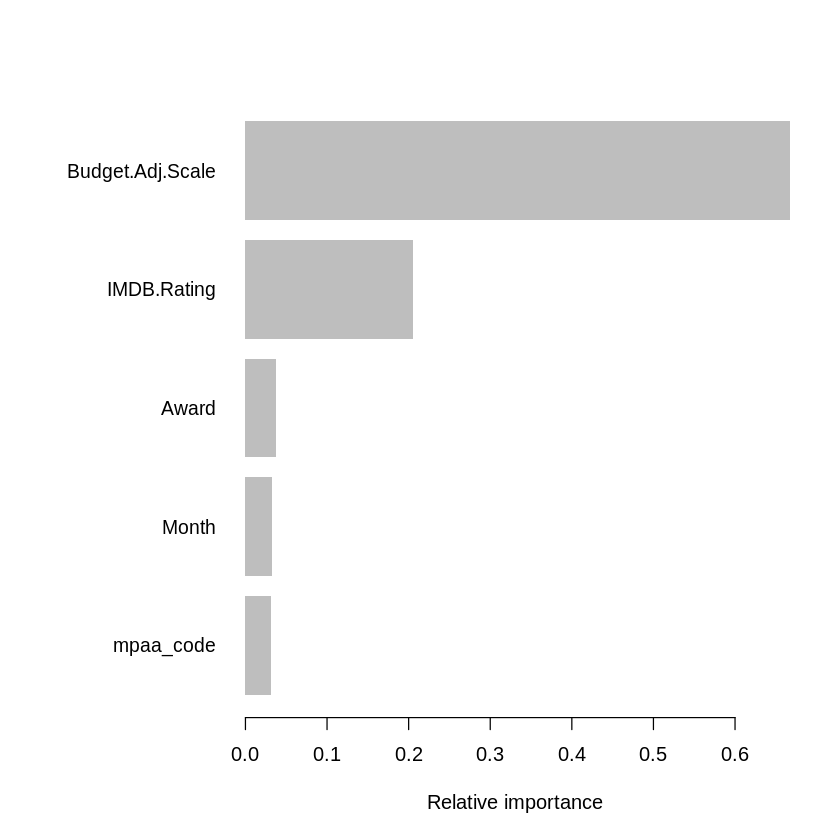

In [ ]:
#Compute feature importance matrix
importance_matrix = xgb.importance(colnames(xgb_train), model = model_xgboost)
importance_matrix

#Plot feature importance graph
xgb.plot.importance(importance_matrix[1:5,], plot = TRUE, xlab = "Relative importance")

In [ ]:
#Generate predictions
pred = predict(model_xgboost, xgb_test)

In [ ]:
#Calculate the root mean square error (RMSE) for test set
residuals = test_y - pred
RMSE = sqrt(mean(residuals^2))
print(paste0("RMSE = ", round(RMSE,4)))

[1] "RMSE = 0.8299"


In [ ]:
#Calculate R-squared for test set
y_test_mean = mean(test_y)

#Calculate total sum of squares
TSS = sum((test_y - y_test_mean)*(test_y - y_test_mean))

#Calculate residual sum of squares
RSS = sum(residuals^2)

#Calculate R-squared
R_squared = 1 - (RSS/TSS)
print(paste0("R-squared = ", round(R_squared,3)))

[1] "R-squared = 0.503"


---

## Profitability Model 2

### a. Elastic Net Regression on Profitability

In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Install and load the glmnet package
library(glmnet)

In [ ]:
#feature scaling done after encoding
oscar <- oscar %>%
  mutate(Profitability.Adj.Scale = scale(oscar$Profitability.Adjusted)) %>%
  mutate(Worldwide.Adj.Scale  = scale(oscar$Worldwide.Adjusted)) %>%
  mutate(Budget.Adj.Scale = scale(oscar$Budget.Adjusted))
head(oscar)

,Year,Title,Budget,Worldwide,Release,Duration,MPAA.Rating,IMDB.Rating,Genre,Award,⋯,Profitability.Adjusted,Worldwide.Adjusted,Budget.Adjusted,genre_code,mpaa_code,Profitability.Adj.Scale,Worldwide.Adj.Scale,Budget.Adj.Scale,predicted,residuals
,<int>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1,2019,The Cotton Club,4.80e+07,25928721,14-12-20,129,R,6.5,Crime,0,⋯,-32773670,38501591,71275261,6,11,-0.53833837,-0.37990559,0.33352092,0.177171652,-0.71551002
2,2019,Superman II,5.40e+07,190400000,19-06-20,127,PG,6.8,Action,0,⋯,202540534,282725203,80184669,1,9,0.43442898,0.47605774,0.46963783,0.338549803,0.09587917
3,2019,Stone Cold,2.50e+07,9286314,17-05-20,92,R,6.0,Action,0,⋯,-23333272,13789260,37122532,1,11,-0.49931263,-0.46651822,-0.18826056,-0.181698615,-0.31761402
4,2019,Blue Streak,3.60e+07,117448157,17-09-20,93,PG-13,6.3,Action,0,⋯,120942472,174398918,53456446,1,10,0.09711007,0.09639204,0.06128711,-0.002265647,0.09937572
5,2019,Message in a Bottle,3.00e+07,52880016,12-02-20,126,PG-13,6.2,Drama,0,⋯,33974565,78521603,44547038,8,10,-0.26240728,-0.23964207,-0.07482980,-0.065728423,-0.19667886
6,2019,Star Wars Ep. I: The Phantom Menace,1.15e+08,1027044677,19-05-20,136,PG,6.5,Action,0,⋯,1354296306,1525059953,170763647,1,9,5.19568175,4.83023535,1.85349306,1.092211337,4.10347041


In [ ]:
#Create dataframe with selected columns
oscar_df <- oscar[, c("Profitability.Adj.Scale", "Budget.Adj.Scale", "Award", "Month", "IMDB.Rating", "genre_code", "mpaa_code")]
#oscar_df

In [ ]:
#train-test-split
sample <- sample(c(TRUE, FALSE), nrow(oscar_df), replace=TRUE, prob=c(0.8, 0.2))
train  <- oscar_df[sample,]
test   <- oscar_df[!sample,]
#tail(train)
#tail(test)

In [ ]:
set.seed(1234)

# Elastic Net Regression model
control <- trainControl(method = "repeatedcv", number = 10, repeats = 10)

In [ ]:
# Train Elastic Net Regression model
elastic_model <- train(Profitability.Adj.Scale ~ .,
                           data = train,
                           method = "glmnet",
				   trControl = control, na.action = na.omit)

elastic_model

glmnet 

4698 samples
   6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 4210, 4211, 4210, 4210, 4210, 4210, ... 
Resampling results across tuning parameters:

  alpha  lambda       RMSE       Rsquared   MAE      
  0.10   0.001191053  0.7879203  0.3959528  0.4284658
  0.10   0.011910526  0.7879080  0.3959386  0.4276451
  0.10   0.119105257  0.7907490  0.3952188  0.4191401
  0.55   0.001191053  0.7879374  0.3959410  0.4284609
  0.55   0.011910526  0.7880667  0.3957055  0.4260533
  0.55   0.119105257  0.7969246  0.3918218  0.4120712
  1.00   0.001191053  0.7879476  0.3959382  0.4285113
  1.00   0.011910526  0.7883744  0.3952721  0.4246847
  1.00   0.119105257  0.8085803  0.3806602  0.4111571

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 0.1 and lambda = 0.01191053.

### b. Assess Elastic Net Regression Model Quality using RMSE

glmnet variable importance

                  Overall
Budget.Adj.Scale 0.582948
IMDB.Rating      0.147799
Award            0.147176
Month            0.008646
mpaa_code        0.007447
genre_code       0.006007


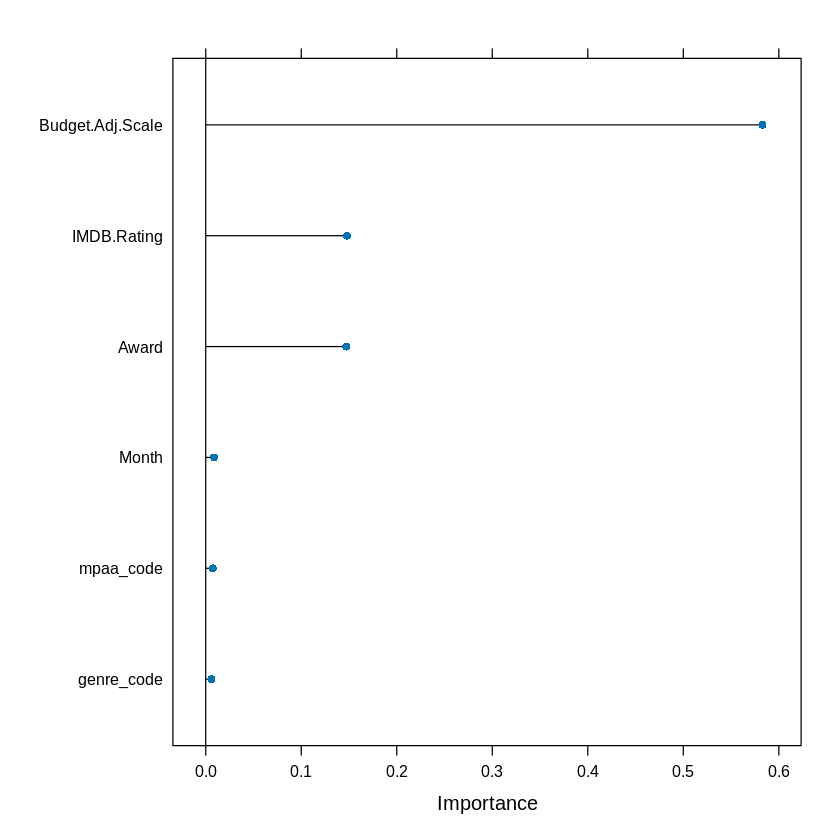

In [ ]:
#importance graph shows that Budget, Award and IMDB Rating affect Profitability
importance <- varImp(elastic_model, scale=FALSE)
plot(importance)
print(importance)

In [ ]:
#Mean RMSE score and RSquared of train model
mean(elastic_model$resample$RMSE)
mean(elastic_model$resample$Rsquared)

[1] 0.787908

[1] 0.3959386

In [ ]:
# Model Prediction
pred_y <- predict(elastic_model, newdata = test[,-1], interval = "prediction")
#pred_y

In [ ]:
# Performance metrics on the test data
test_y = test[,1]
mean((test_y - pred_y)^2) #mse - Mean Squared Error
caret::RMSE(test_y, pred_y) #rmse - Root Mean Squared Error

Warning message in test_y - pred_y:
“longer object length is not a multiple of shorter object length”


[1] 0.8054338

Warning message in pred - obs:
“longer object length is not a multiple of shorter object length”


[1] 0.8974596

In [ ]:
predictions <- predict(elastic_model, newdata = test)
RMSE(predictions, test$Profitability.Adj.Scale)

Warning message in pred - obs:
“longer object length is not a multiple of shorter object length”


[1] 0.8974596

In [ ]:
rss <- sum((pred_y - test_y) ^ 2)  ## residual sum of squares
tss <- sum((test_y - mean(test_y)) ^ 2)  ## total sum of squares
rsq <- 1 - rss/tss
rsq

Warning message in pred_y - test_y:
“longer object length is not a multiple of shorter object length”


[1] 0.07017435

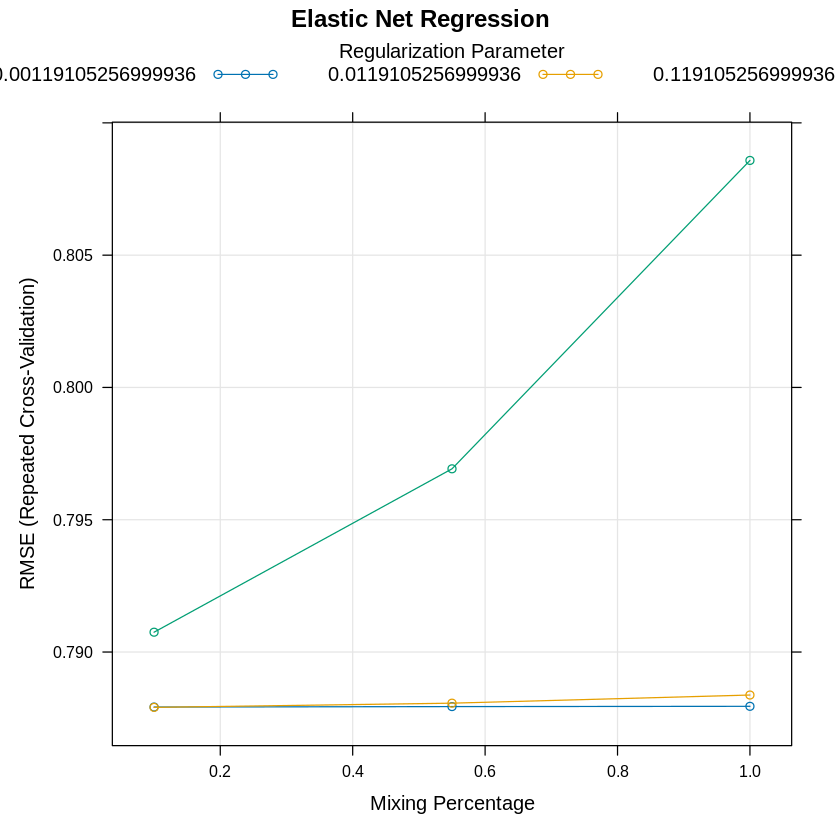

In [ ]:
# Plot
plot(elastic_model, main = "Elastic Net Regression")

Both models also show that the top 3 important features that affect profitability of a movie are:

1.   Budget.Adjusted
2.   IMDB Rating
3.   Award

# Section: Success Factor 2 - Likelihood of Winning an Oscar (Categorical Data Analysis)

## Oscar Likelihood Model 1

### a. Classification Trees for Likelihood of Winning an Oscar


In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load packages
library(tidyverse)
library(lubridate)
library(randomForest)
library(caret)
library(pROC)

In [ ]:
# Data prep
df_tree <- oscar %>%
    mutate(oscar = as.factor(if_else(Award>=1,1,0))) %>%
    filter(Year %in% c("2020","2019"))

# Select only require columns
df_tree <- df_tree %>%
    mutate(Genre = fct_lump_min(Genre,10)) %>%
    select(oscar, Budget.Adjusted, Month, Duration, Genre, MPAA.Category, IMDB.Rating) %>%
    filter(!is.na(Budget.Adjusted))

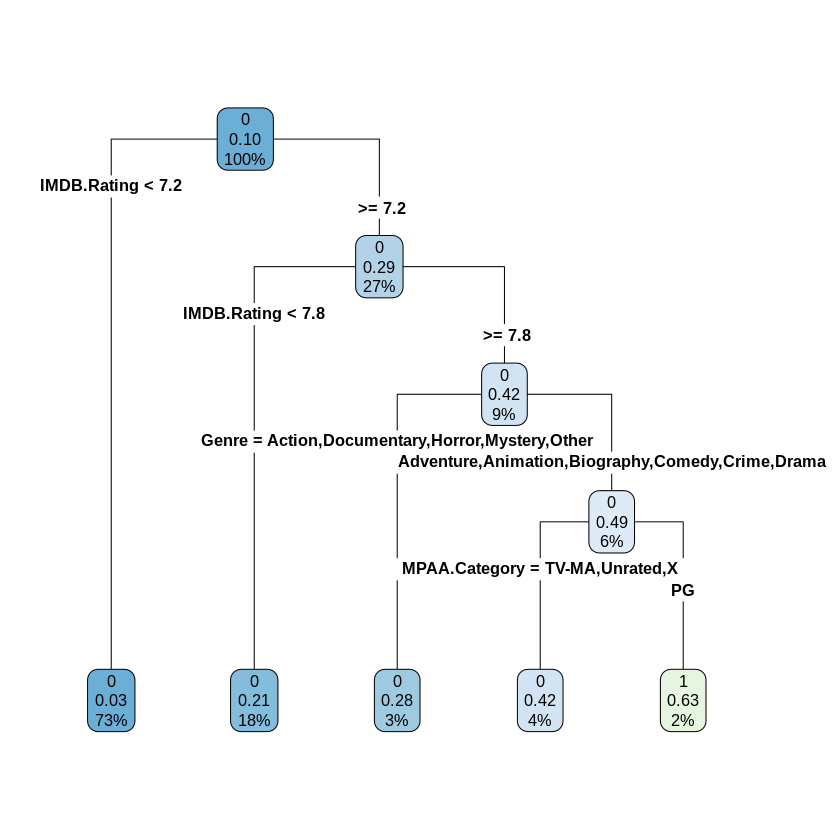

In [ ]:
# Build the Tree model
set.seed(1234)
model_tree <- rpart(oscar~., data = df_tree, method = 'class')
rpart.plot(model_tree, type=4)

### b. Assess Random Forest Model Quality using ROC/AUC

#### Predictions

In [ ]:
df_tree_pred <- df_tree %>%
    mutate(pred_prob = predict(model_tree, newdata = df_tree)[,1]) %>%
    mutate(pred = (if_else(pred_prob>=0.5,0,1)) %>% as.factor)

#### Accuracy Matrix

In [ ]:
confusionMatrix(data=df_tree_pred$oscar,
                reference=df_tree_pred$pred,
                positive='1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5213   44
         1  519   76
                                         
               Accuracy : 0.9038         
                 95% CI : (0.896, 0.9112)
    No Information Rate : 0.9795         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1848         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.63333        
            Specificity : 0.90946        
         Pos Pred Value : 0.12773        
         Neg Pred Value : 0.99163        
             Prevalence : 0.02051        
         Detection Rate : 0.01299        
   Detection Prevalence : 0.10167        
      Balanced Accuracy : 0.77139        
                                         
       'Positive' Class : 1              
                                         

#### ROC AUC Curve

In [ ]:
pred_prob <- predict(model_tree, newdata = df_tree, type = 'prob')
ROC_tree <- roc(df_tree$oscar, pred_prob[,2])

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [ ]:
print(auc(ROC_tree))

Area under the curve: 0.7936


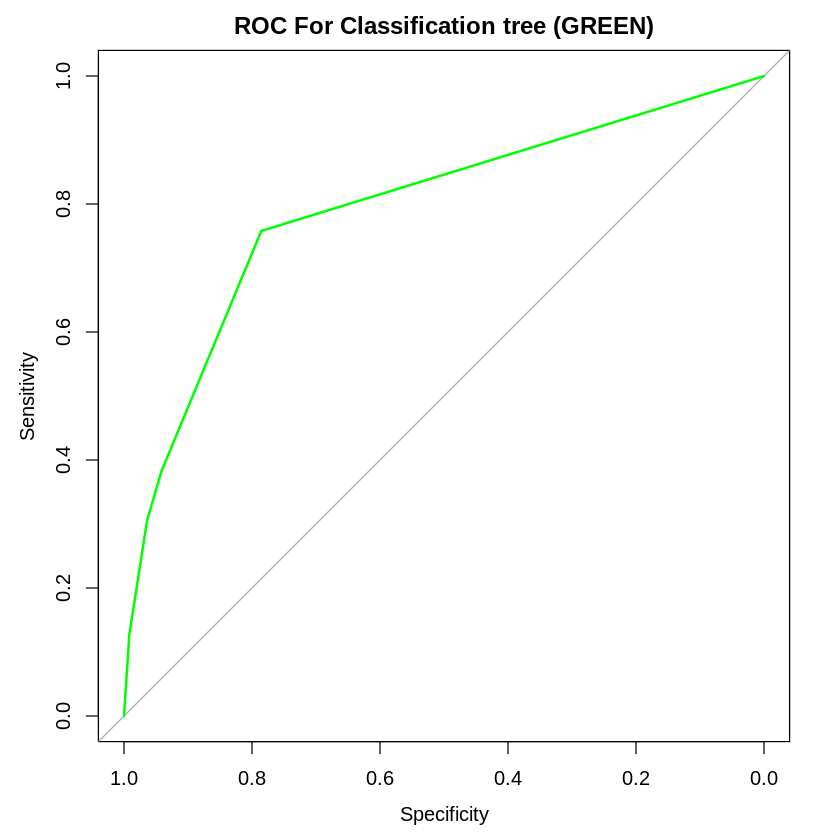

In [ ]:
plot(ROC_tree, col = "green", main = "ROC For Classification tree (GREEN)")

---

## Oscar Likelihood Model 2

### Logistic Regression for Likelihood of Winning an Oscar

In [ ]:
head(oscar)

In [ ]:
summary(oscar)

In [ ]:
oscar_subset <- oscar[, c("Budget", "Worldwide", "Duration", "Award", "Month", "Profitability")]

In [ ]:
# oscar_subset <- oscar_subset[oscar_subset$Award != 0, ]

In [ ]:
head(oscar_subset)

In [ ]:
oscar_subset$Oscar_Winner <- ifelse(oscar_subset$Award != 0, 1, 0)

In [ ]:
# Create a logistic regression model
model <- glm(Oscar_Winner ~ Budget + Worldwide + Duration + Month + Profitability, data = oscar_subset, family = binomial)

In [ ]:
summary(model)


Call:
glm(formula = Oscar_Winner ~ Budget + Worldwide + Duration + 
    Month + Profitability, family = binomial, data = oscar_subset)

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.444e+00  2.488e-01 -25.896  < 2e-16 ***
Budget        -1.836e-08  1.796e-09 -10.223  < 2e-16 ***
Worldwide      3.964e-09  3.204e-10  12.372  < 2e-16 ***
Duration       3.028e-02  1.961e-03  15.441  < 2e-16 ***
Month          1.190e-01  1.458e-02   8.168 3.14e-16 ***
Profitability         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3847.9  on 5852  degrees of freedom
Residual deviance: 3279.6  on 5848  degrees of freedom
AIC: 3289.6

Number of Fisher Scoring iterations: 5


### Assess Logistic Regression Model Quality using ROC/AUC

#### Predictions

In [ ]:
predicted_probs <- predict(model, newdata = oscar_subset, type = "response")

In [ ]:
threshold <- 0.075
predictions <- ifelse(predicted_probs >= threshold, 1, 0)

In [ ]:
oscar_subset$predictions <- predictions

In [ ]:
head(oscar_subset)

#### Contingency Table

In [ ]:
# Generate the contingency table
contingency_table <- table(oscar_subset$Oscar_Winner, oscar_subset$predictions)

# Print the contingency table
print(contingency_table)

   
       0    1
  0 3118 2140
  1  123  472


#### ROC/AUC Curve

In [ ]:
library(pROC)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6931


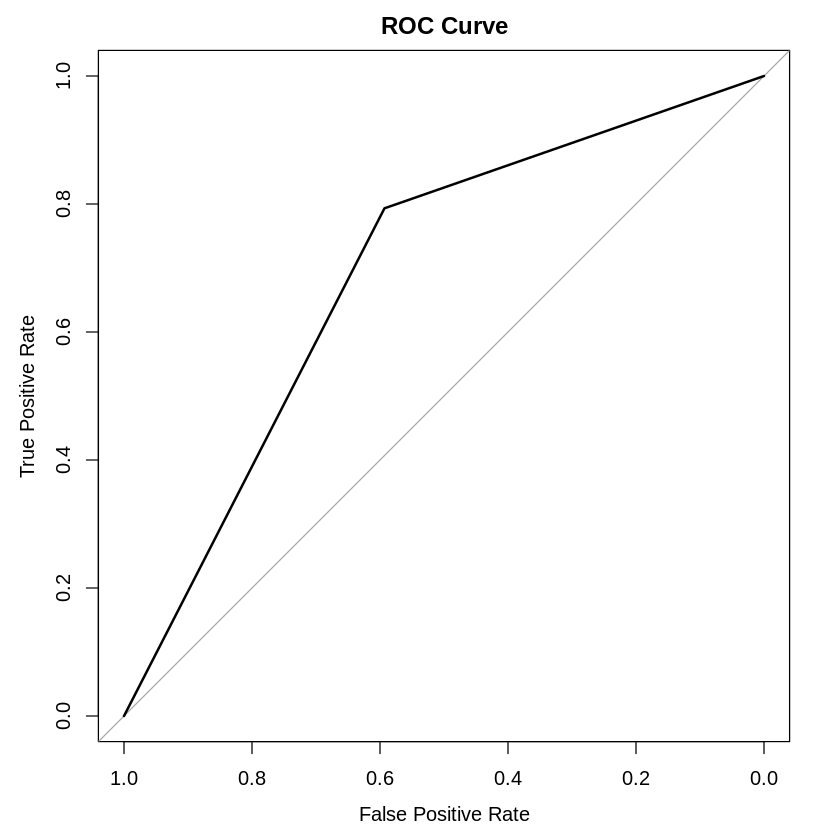

In [ ]:
# Predict probabilities of the positive class
predicted_probs <- predict(model, newdata = oscar_subset, type = "response")

# Create a roc object
roc_obj <- roc(oscar_subset$Oscar_Winner, oscar_subset$predictions)

# Plot the ROC curve
plot(roc_obj, main = "ROC Curve", xlab = "False Positive Rate", ylab = "True Positive Rate")

# Print ROC curve area
print(auc(roc_obj))

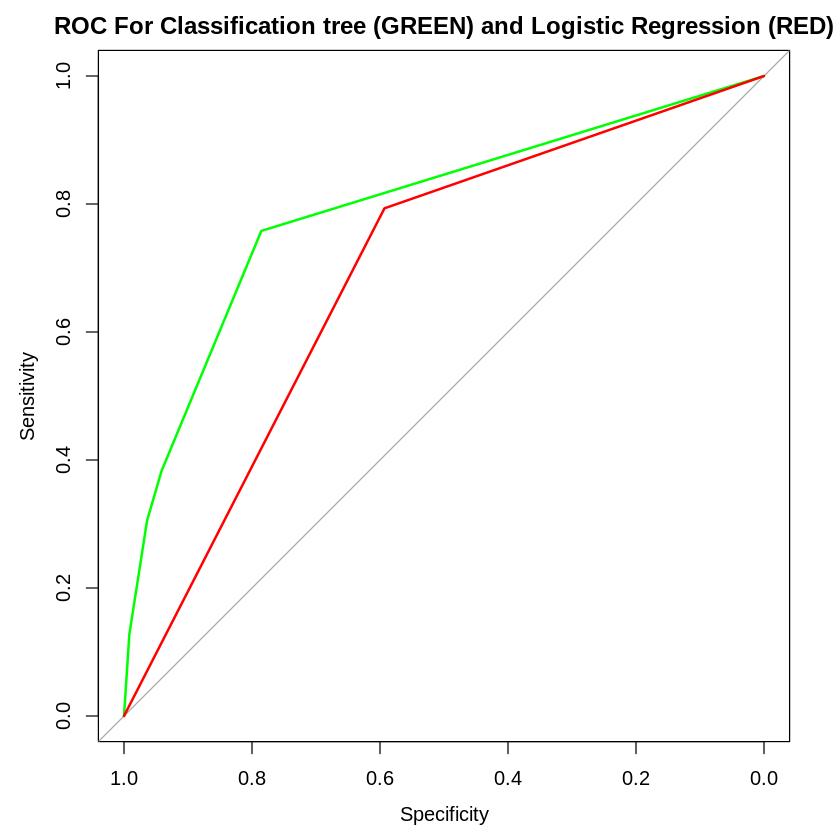

In [ ]:
# Compare classification models
plot(ROC_tree, col = "green", main = "ROC For Classification tree (GREEN) and Logistic Regression (RED)")
lines(roc_obj, col = "red")

In [ ]:
#Compare both ROC to see which models does better at classifying the data into categories
print(auc(ROC_tree))
print(auc(roc_obj))

#As the Area under the curve is higher for the Logistic Regression model compared to the decision tree (0.69 vs 0.65), it is better at classifying the data into categories
#However, it might be easier to use decision tree instead to provide parameter guidelines for planning a movie instead of using a "Blackbox Model"
#as we expect multiple stakeholders to be involved in different stages of the movie making process.
#e.g. a editor would understand that a movie has to be no shorter then 126 minutes for a higher probabilty of winning an oscar compared to waiting for all variables to be available before concluding his work

---

--------

# Conclusions

What makes a movie successful (profitable/award-winning)?

From corr matrix, Profitability has correlation of 0.19102790 with Award, -0.18757325 with Genre, -0.057835501 with MPAA rating and 0.58758063 with Budget.

XGBoost Relative Importance Plot shows:
Budget, Award and IMDB Rating affects Profitability more than other variables.

IMBD Rating & Awards impact Profitability

Classification Tree

Log Regression

---

# GITHUB UPDATES

The progress of our project can be viewed on the Team 1 Github page under the “Progress Report” Folder
(https://github.dev/MGT-6203-Summer-2023-Edx/Team-1/tree/main/Progress%20Report)

---

# LITERATURE REFERENCES

1. Kaggle. (n.d.). Predicting movie success. Retrieved from
https://www.kaggle.com/code/harshadeepvattikunta/predicting-movie-success

2. Folaron, D. (2019). Predicting movie box office success: Determining the influence of critical reception,
genre, and budget. University of Tennessee, Knoxville. Retrieved from
https://trace.tennessee.edu/cgi/viewcontent.cgi?article=3282&context=utk_chanhonoproj#:~:text=With%20i
nformation%20like%20the%20budget,more%20or%20less%20than%20expected.

---